# Stochastic Gradient Descent Tutorial 1

**Prepared by:** Reza Farzad (rfarzad@nd.edu, 2023)

## **1. Introduction** 

In optimization, the goal is to find the argument corresponding to the minimum loss function. A loss function with two arguments is a surface in 3d space and the objective is to find the lowest point of this surface. One way is to use gradient descent (GD or Batch Gradient Descent or **BGD**) and go toward the lowest point by detecting the sharpest slope using the entire dataset to compute the loss function. Another method is the pure Stochastic Gradient Descent (**SGD**) that is another iterative optimization method through which the algorithm uses only a single sample for loss function computation to speed up the process. This algorithm starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function. The third method which is called mini-Batch Gradient Descent (**mBGD**) is a cross-over between BGD and SGD. This method which is widely used in training deep neural network is a balance between BGD and pure SGD. This method is widely used, especially in machine learning since it is efficient (less memory, fast computation) and easy to apply (most of the time the second and third methods both are called SGD). The final goal of this project is to create a notebook that helps students know these methods, their differences, and how to use them for possible problems through simple examples and step-by-step algorithms.

### 1-1. Objective

The goal is to compare three different kinds of Gradient Descent & how to compute the following loss function (using least square error) based on them:
$$l(\theta) = \sum_{i=1}^{k} (y_i - f(x_i, \theta))^2$$
1. Batch Gradient Descent (**BGD** or **GD**): The algorithm uses the entire dataset to compute the loss function, i.e., k = N is the total number of data (population).

2. Stochastic Gradient Descent (**SGD**): The algorithm uses only one sample for loss computation to speed up the process, i.e., k = 1.

3. Mini-Batch Gradient Descent (**mBGD**): The cross-over between GD and SGD, i.e., 1 < k < N is a sample of dataset.

### 1-2. Formulation & Algorithm

**1-2-1. Formulation:**

Typically, the problem is formulated as an optimization problem:
$$
\begin{equation}
\theta_t^* = \arg \underset{\theta}{\min} \frac 1 t \sum_{i=1}^{t} \left(L(f_{\theta}(x_i), y_i) + R(\theta)\right)
\end{equation}
$$
where $t$ is the number of data points, $\theta_t^*$ is the parameter that minimize the empirical cost, $(x_i, y_i)$ are the $i^{th}$ training example, $L(s, y)$ is a loss function which gives small value if $s$ is a good prediction for $y$, and $R(\theta)$ is a regularization function for $\theta$  which typically gives small value for small $\theta$. 

For stochastic gradient descent (SGD) method, let $d=(x, y)$ be one data sample, $l(\theta, d) = L(f_{\theta}(x), y) + R(\theta)$ be the cost of $\theta$ for $d$, $g(\theta, \xi) = \frac{\partial l(\theta, d)}{\partial \theta}$ be the gradient function, and $D_t = (d_1, \cdots, d_t)$ be all the training samples at $t^{th}$ step. The SGD method updates $\theta$ according to its  stochastic gradient:
$$
\begin{equation}
    \theta_t = \theta_{t-1} - \gamma_t g(\theta_{t-1}, d_t)
\end{equation}
$$ **bold text**
where $\gamma_t$ is learning rate at the $t^{th}$ step.

The formulation of gradient descent is very similar to the above equation but focusing on total data samples in each iteration:
$$
\begin{equation}
\theta_t = \theta_{t-1} - \gamma_t G(\theta_{t-1})
\end{equation}
$$

**1-2-2. Algorithm (PseudoCode) for BGD, SGD, & mBGD:**

1. Initialize the vector of model parameters $\boldsymbol\theta = (\theta_1, \cdots, \theta_n)$
2. Define the learning rate $\gamma_t$, grad threshold, maximum number of iterations, and the batch size (k):
- If SGD, then k = 1, (only one data)
- If BGD, then k = N, (total number of data)
- If mBGD, then 1 < k < N, (a sample of dataset)
3. Initialize a vector to save updated parameters  $\boldsymbol\theta_t$ and their corresponding loss value
4. for t=1:max_iter do

  4.1. Choose the k data and call it d

  4-2. Use the parameters to compute the loss function
$$
\begin{equation}
    l(\boldsymbol\theta_{t-1}, d) = \sum_{i=1}^{k} (y_i - f(x_i, \boldsymbol\theta_{t-1}))^2 
\end{equation}
$$
   4-3. Compute the gradient of loss function above with respect to the latest model parameters
$$
\begin{equation}
    \frac{\partial l(\boldsymbol\theta_{t-1}, d)}{\partial \theta}
\end{equation}
$$
    4-4. Update the parameters
$$
\begin{equation}
    \boldsymbol\theta_t = \boldsymbol\theta_{t-1} - \gamma_t (\frac{\partial l(\boldsymbol\theta_{t-1}, d)}{\partial \theta})
\end{equation}
$$
  4-5. Save the $\boldsymbol\theta_t$ and its loss value in the vector initialized in step 3

  4-6. If  $\lVert \frac{\partial l(\boldsymbol\theta_{t-1}, d)}{\partial \theta} \rVert ≤ grad\_threshold$, then break the loop

  end for loop of step 4

### 1-3. Functions

In [4]:
# Import libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy import linalg
import time
import sys

In [5]:
## Calculate gradient with central finite difference
def grad_approx(x,f,eps1,verbose=False):
    '''
    Calculate gradient of function f using central difference formula
    
    Inputs:
        x - point for which to evaluate gradient
        f - function to consider
        eps1 - perturbation size
        
    Outputs:
        grad - gradient (vector)
    '''
    
    n = len(x)
    grad = np.zeros(n)
    
    if(verbose):
        print("***** my_grad_approx at x = ",x,"*****")
    
    for i in range(0,n):
        
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps1
        
        # Finite difference formula
        my_f_plus = f(x + e)
        my_f_minus = f(x - e)
        
        # Diagnostics
        if(verbose):
            print("e[",i,"] = ",e)
            print("f(x + e[",i,"]) = ",my_f_plus)
            print("f(x - e[",i,"]) = ",my_f_minus)
        
        
        grad[i] = (my_f_plus - my_f_minus)/(2*eps1)
    
    if(verbose):
        print("***** Done. ***** \n")
    
    return grad

In [53]:
## Function for contout_plot of f(x, y)
def contour_plot(f, x_min, x_max, n_x, y_min, y_max, n_y):
  # fig = plt.figure(figsize=(4,4))

  xpts = np.linspace(x_min, x_max, n_x)
  ypts = np.linspace(y_min, y_max, n_y)
  [X, Y] = np.meshgrid(xpts, ypts)
  Z = np.zeros([len(X), len(Y)])
  for i in range(0, len(X)):
    for j in range(0, len(Y)):
      Z[i, j] = f([X[0, i], Y[j, 0]])

  plt.xlabel('$\\theta_0$', fontsize=16, fontweight='bold')
  plt.ylabel('$\\theta_1$', fontsize=16, fontweight='bold')
  plt.title('Loss Function', fontsize = 16, fontweight = 'bold')

  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.tick_params(direction="in",top=True, right=True)
  
  plt.contourf(X, Y, Z)
  plt.show()

In [49]:
## Function for contout_plot of f(x, y)
def contour_surface_plot(f, x_min, x_max, n_x, y_min, y_max, n_y):
  
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(4,4))

  # Make the data
  xpts = np.linspace(x_min, x_max, n_x)
  ypts = np.linspace(y_min, y_max, n_y)
  [X, Y] = np.meshgrid(xpts, ypts)

  Z = np.zeros([len(X), len(Y)])
  for i in range(0, len(X)):
    for j in range(0, len(Y)):
      Z[i, j] = f([X[0, i], Y[j, 0]])
  
  # Plot the surface
  surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
  

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.5, aspect=5, location = 'left')

  plt.xlabel('$\\theta_0$', fontsize=16, fontweight='bold')
  plt.ylabel('$\\theta_1$', fontsize=16, fontweight='bold')
  plt.title('Loss Function Surface', fontsize=16, fontweight='bold')
  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.tick_params(direction="in",top=True, right=True)
  
  plt.show()

In [8]:
## Loss function based on least squares:
 # Given Xi = [x1i, x2i, x3i, ..., xni] and yi = f(Xi, theta)
 # where, f: R^n -> R, i = 1,2,..,m, and theta are the parameters in f,
 # the loss function is given by:
 # LF = Sum((yi - f(Xi))^2, i=1,2,...,n)
 # Inputs: data - numpy array [x1i, x2i, ..., xni, yi]
 #         f - function to which the data needs to be fit
 #         theta - parameters in the function f
 #         index_list - indices in data that will be considered
 #                      to compute the loss function
 # Output: Value of the loss function
def least_squares_loss_function(data, f, theta, index_list):
    sum = 0
    if len(data[0]) == 2:
      for i in index_list:
          sum = sum + (data[i, -1] - f(theta, data[i, 0]))**2
    else:
      for i in index_list:
          sum = sum + (data[i, -1] - f(theta, data[i, 0:-2]))**2
        
    return sum

In [9]:
## Do SGD, mBGD or BGD based on the data and hyperparameters 
## to return loss value and updated parameters
def SGD_mBGD_BGD(data_samples, function, initial_parameters, 
                                loss_function, gradient_function, 
                                learning_rate=0.1,
                                batch_size=1,
                                max_iterations=1000,
                                verbose=True,
                                eps=1e-7,
                                gradient_threshold=1e-7):
  
    ####################
    ##### Step  3  #####
    ####################
    # Initialize a vector to save updated vector of parameters
    parameter_values = [initial_parameters]

    # Initialize a list to save the loss values
    loss_values = []
    
    if verbose:
        print("Iter. \tloss_func(x) \t\t||grad(x)|| \t||p||\n")
    
    ####################
    ##### Step  4  #####
    ####################
    for iteration in range(max_iterations):
        
        ###########################
        ##### Steps 4-1 & 4-2 #####
        ###########################
        if batch_size < len(data_samples): # If SGD or mBGD:
            # Choose random indices of data for computing loss function ##### Step 4-1 ####
            index_list = np.random.choice(range(len(data_samples)), size=batch_size, replace = False)

            # Compute loss function ##### Step 4-2 #####
            loss_func = lambda parameters: loss_function(data_samples, function, parameters, index_list)

        elif iteration == 0: # If BGD:
            # Compute loss function ##### Step 4-2 #####
            loss_func = lambda parameters: loss_function(data_samples, function, parameters, range(0, len(data_samples)))
        
        #####################
        ##### Steps 4-3 #####
        #####################
        # Compute the gradient of the loss function wrt the latest parameters
        gradient = gradient_function(parameter_values[iteration], loss_func, eps)
        
        #####################
        ##### Steps 4-4 #####
        #####################
        # Calculate the step using learning rate
        step = learning_rate * gradient

        # Update parameters
        new_parameter_value = parameter_values[iteration] - step
        
        #####################
        ##### Steps 4-5 #####
        #####################
        # Save the updated parameters and their loss value in the vectors defined in step 3
        parameter_values.append(new_parameter_value.tolist())
        loss_values.append(loss_func(new_parameter_value))
        
        if verbose:
            print(iteration, ' \t{0: 1.4e} \t{1:1.4e} \t{2:1.4e}'.format( \
                  loss_values[iteration],linalg.norm(gradient),linalg.norm(step)), end='\n')
        
        #####################
        ##### Steps 4-6 #####
        #####################
        # Check if the norm of gradient is below the threshold, announce the 'Success' and break the loop
        if linalg.norm(gradient) <= gradient_threshold:
            print("SUCCESS")
            print("Gradient below the specified tolerance\n")
            break

    if iteration == max_iterations - 1:
        print("Max iterations reached\n")
    
    return np.array(parameter_values), np.array(loss_values)

## **2. SGD** vs **BGD** vs **mBGD**

### 2-1. Problem 1 - Small Dataset (100 Data)

**2-1-1. Generate Dataset**

Problem 1 - Nonconvex Input with Convex Loss

Lets consider a nonconvex cubic function.

Let $D = \{(x_i, y_i), i=1,2,...,t\}$ be the data set generated from the following function:
$$ y_i = x_i^3 + 1 + \delta,$$
where, $\delta$ is a random variable with standard normal probability distribution.

This data set is generated in the following code snippets.

In [10]:
def f3(theta, x):
    return theta[0]*x**3 + theta[1]

In [11]:
def generate_data_f3(x, start_value, end_value, n, sigma_noise):
    step = (end_value - start_value)/n;
    fvals = np.zeros([n, 2])
    fvals_pure = np.zeros([n, 2])
    rands = np.random.normal(0, sigma_noise, n)
    for i in range(0, n):
        value = start_value + step*i
        fvals_pure[i] = [value, f3(x, value)]
        fvals[i] = [value, f3(x, value)+rands[i]]
        
    return [fvals, fvals_pure]

In [12]:
[data, fx] = generate_data_f3([1, 1], -2, 2, 100, 0.1)

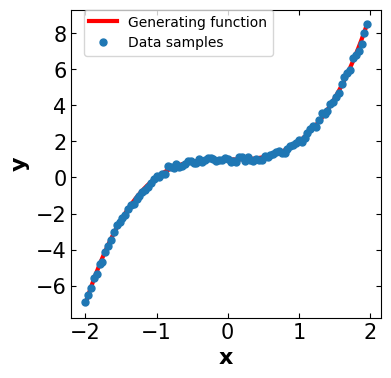

In [87]:
fig = plt.figure(figsize=(4,4))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

plt.plot(fx[:, 0], fx[:, 1], 'r', markersize=3, linewidth=3)
plt.plot(data[:, 0], data[:, 1], 'o', markersize=5, linewidth=3)
plt.legend(["Generating function", "Data samples"],fontsize=10,bbox_to_anchor=(0.65, 1.0),borderaxespad=0)
plt.xlabel('x',fontsize=16,fontweight='bold')
plt.ylabel('y',fontsize=16,fontweight='bold')

plt.show()

# # Save to file (for including in manuscript)
# fname = 'Small Dataset Samples'
# fig.savefig(fname+'.png',dpi=300,bbox_inches='tight')

**2-1-2. Plot the loss function contours**

Let us consider only the data samples and fit the data set to the following function:
$$y = f(x, \theta) = \theta_0 x^3 + \theta_1.$$
In other words, the task is to estimate $\theta = [\theta_0, \theta_1]$ that fits the function $f(x)$ with minimum *least square error*.

The least square error can be defined as:
$$l(\theta) = \sum_{i=1}^t (y_i - f(x_i, \theta))^2.$$
The least square error $l(\theta)$ is considered as the loss function that needs to be minimized with $\theta$ as the decision variables to fit the data set to $f(x, \theta)$.

The following code snippets define and visualize the least square error loss function

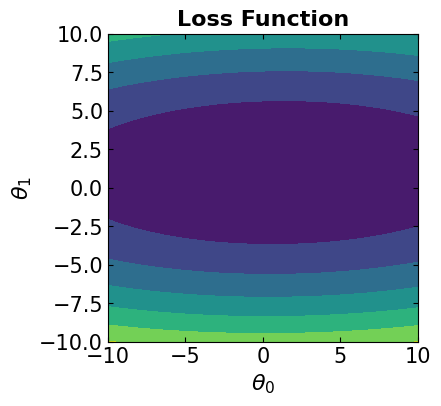

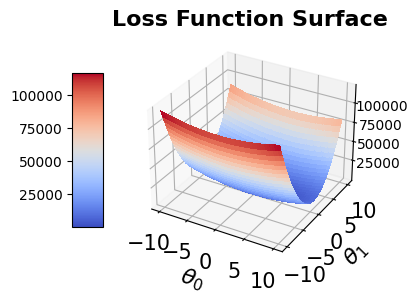

In [61]:
# Loss function with theta = [theta1, theta2] as input
LFx = lambda theta : least_squares_loss_function(data, f3, theta, range(0, len(data)))

# Plot of the loss function
fig = plt.figure(figsize=(4,4))
contour_plot(LFx, -10., 10., 50, -10., 10., 50)
contour_surface_plot(LFx, -10., 10., 50, -10., 10., 50)

Let's apply the three different types of "Gradient Descent" to minimize the loss function above:

**2-1-3. BGD: (Batch size = t or length of data)**

In this case, all the data samples are considered for computing the loss function. The algorithm is the same as steepest gradient descent. We should note that if we see jagged convergence to the solution for Gradient Descent method, it means that the learning rate is quite high and must be reduced to prevent overshooting.

Iter. 	loss_func(x) 		||grad(x)|| 	||p||

0  	 1.5465e+04 	7.2953e+03 	7.2953e-02
1  	 1.4956e+04 	7.1632e+03 	7.1632e-02
2  	 1.4466e+04 	7.0335e+03 	7.0335e-02
3  	 1.3993e+04 	6.9062e+03 	6.9062e-02
4  	 1.3538e+04 	6.7813e+03 	6.7813e-02
5  	 1.3098e+04 	6.6587e+03 	6.6587e-02
6  	 1.2675e+04 	6.5383e+03 	6.5383e-02
7  	 1.2266e+04 	6.4202e+03 	6.4202e-02
8  	 1.1872e+04 	6.3043e+03 	6.3043e-02
9  	 1.1493e+04 	6.1905e+03 	6.1905e-02
10  	 1.1126e+04 	6.0788e+03 	6.0788e-02
11  	 1.0773e+04 	5.9692e+03 	5.9692e-02
12  	 1.0433e+04 	5.8616e+03 	5.8616e-02
13  	 1.0104e+04 	5.7560e+03 	5.7560e-02
14  	 9.7878e+03 	5.6523e+03 	5.6523e-02
15  	 9.4825e+03 	5.5506e+03 	5.5506e-02
16  	 9.1881e+03 	5.4508e+03 	5.4508e-02
17  	 8.9041e+03 	5.3529e+03 	5.3529e-02
18  	 8.6303e+03 	5.2567e+03 	5.2567e-02
19  	 8.3662e+03 	5.1623e+03 	5.1623e-02
20  	 8.1114e+03 	5.0697e+03 	5.0697e-02
21  	 7.8658e+03 	4.9789e+03 	4.9789e-02
22  	 7.6288e+03 	4.8897e+03 	4.8897e-02
23  	 7.4003e+03 	4.8021e

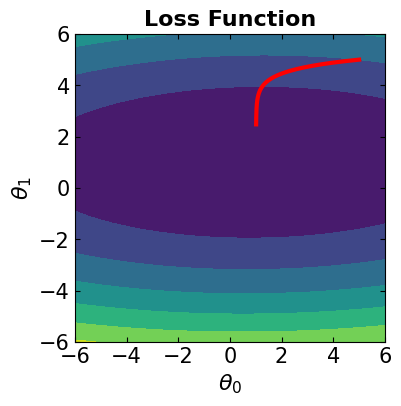

The optimal solution is: theta0 =  1.0163458431736672 , theta1 =  2.478808831685626
The corresponding loss function is:  222.73511700400618


In [57]:
### If learning rate = 0.00001 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.00001

# Set the gradient threshold:
grad_thres = 1e-7

# Set the maximum number of iterations:
maxIter = 500

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = len(data)

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, -6., 6., 50, -6, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))

Iter. 	loss_func(x) 		||grad(x)|| 	||p||

0  	 1.1152e+04 	7.2953e+03 	7.2953e-01
1  	 7.9031e+03 	5.9754e+03 	5.9754e-01
2  	 5.7170e+03 	4.9000e+03 	4.9000e-01
3  	 4.2408e+03 	4.0247e+03 	4.0247e-01
4  	 3.2389e+03 	3.3135e+03 	3.3135e-01
5  	 2.5541e+03 	2.7367e+03 	2.7367e-01
6  	 2.0817e+03 	2.2703e+03 	2.2703e-01
7  	 1.7515e+03 	1.8948e+03 	1.8948e-01
8  	 1.5169e+03 	1.5938e+03 	1.5938e-01
9  	 1.3466e+03 	1.3543e+03 	1.3543e-01
10  	 1.2197e+03 	1.1651e+03 	1.1651e-01
11  	 1.1223e+03 	1.0168e+03 	1.0168e-01
12  	 1.0452e+03 	9.0171e+02 	9.0171e-02
13  	 9.8198e+02 	8.1291e+02 	8.1291e-02
14  	 9.2857e+02 	7.4468e+02 	7.4468e-02
15  	 8.8213e+02 	6.9220e+02 	6.9220e-02
16  	 8.4076e+02 	6.5153e+02 	6.5153e-02
17  	 8.0320e+02 	6.1959e+02 	6.1959e-02
18  	 7.6857e+02 	5.9398e+02 	5.9398e-02
19  	 7.3626e+02 	5.7294e+02 	5.7294e-02
20  	 7.0588e+02 	5.5515e+02 	5.5515e-02
21  	 6.7714e+02 	5.3970e+02 	5.3970e-02
22  	 6.4981e+02 	5.2593e+02 	5.2593e-02
23  	 6.2376e+02 	5.1338e

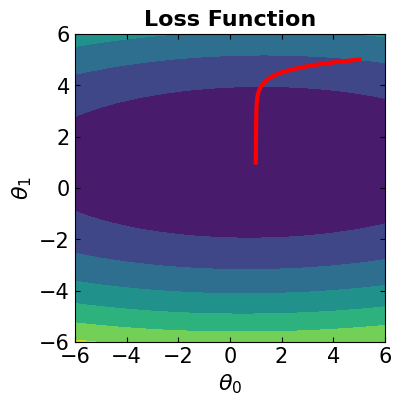

The optimal solution is: theta0 =  1.00135569186099 , theta1 =  0.989616451044002
The corresponding loss function is:  1.067321064779166


In [58]:
### If learning rate = 0.0001 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.0001

# Set the gradient threshold:
grad_thres = 1e-7

# Set the maximum number of iterations:
maxIter = 500

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = len(data)

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, -6., 6., 50, -6, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))

Iter. 	loss_func(x) 		||grad(x)|| 	||p||

0  	 1.0968e+04 	7.2953e+03 	7.2953e+00
1  	 7.5265e+03 	6.0618e+03 	6.0618e+00
2  	 5.1674e+03 	5.0370e+03 	5.0370e+00
3  	 3.5493e+03 	4.1855e+03 	4.1855e+00
4  	 2.4391e+03 	3.4781e+03 	3.4781e+00
5  	 1.6769e+03 	2.8904e+03 	2.8904e+00
6  	 1.1534e+03 	2.4020e+03 	2.4020e+00
7  	 7.9370e+02 	1.9962e+03 	1.9962e+00
8  	 5.4645e+02 	1.6589e+03 	1.6589e+00
9  	 3.7645e+02 	1.3787e+03 	1.3787e+00
10  	 2.5951e+02 	1.1459e+03 	1.1459e+00
11  	 1.7904e+02 	9.5233e+02 	9.5233e-01
12  	 1.2366e+02 	7.9150e+02 	7.9150e-01
13  	 8.5531e+01 	6.5785e+02 	6.5785e-01
14  	 5.9273e+01 	5.4677e+02 	5.4677e-01
15  	 4.1186e+01 	4.5445e+02 	4.5445e-01
16  	 2.8725e+01 	3.7773e+02 	3.7773e-01
17  	 2.0137e+01 	3.1396e+02 	3.1396e-01
18  	 1.4218e+01 	2.6096e+02 	2.6096e-01
19  	 1.0138e+01 	2.1690e+02 	2.1690e-01
20  	 7.3242e+00 	1.8029e+02 	1.8029e-01
21  	 5.3839e+00 	1.4986e+02 	1.4986e-01
22  	 4.0457e+00 	1.2456e+02 	1.2456e-01
23  	 3.1226e+00 	1.0354e

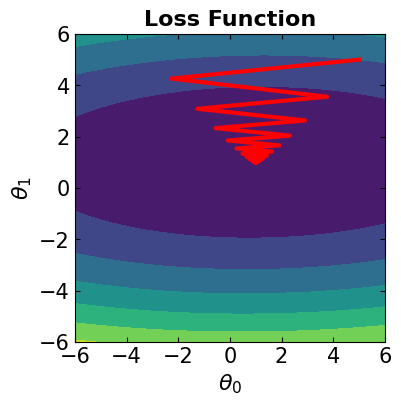

The optimal solution is: theta0 =  1.001354049365295 , theta1 =  0.9894489938894147
The corresponding loss function is:  1.0673182625203745


In [59]:
### If learning rate = 0.001 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.001

# Set the gradient threshold:
grad_thres = 1e-7

# Set the maximum number of iterations:
maxIter = 500

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = len(data)

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, -6., 6., 50, -6, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))

The learning rate is:  1e-05
Max iterations reached

The learning rate is:  2e-05
Max iterations reached

The learning rate is:  3.0000000000000004e-05
Max iterations reached

The learning rate is:  4e-05
Max iterations reached

The learning rate is:  5e-05
Max iterations reached

The learning rate is:  6e-05
Max iterations reached

The learning rate is:  7.000000000000001e-05
Max iterations reached

The learning rate is:  8e-05
Max iterations reached

The learning rate is:  9e-05
Max iterations reached

The learning rate is:  0.0001
Max iterations reached

The learning rate is:  0.00011
Max iterations reached

The learning rate is:  0.00012
Max iterations reached

The learning rate is:  0.00013000000000000002
Max iterations reached

The learning rate is:  0.00014000000000000001
Max iterations reached

The learning rate is:  0.00015000000000000001
Max iterations reached

The learning rate is:  0.00016
Max iterations reached

The learning rate is:  0.00017
Max iterations reached

The le

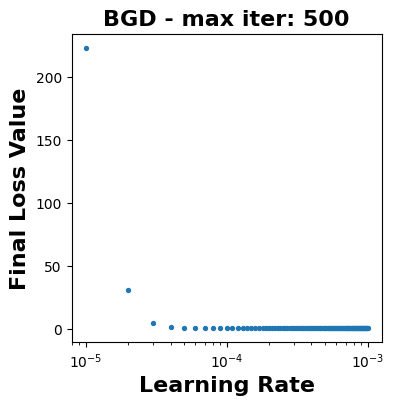

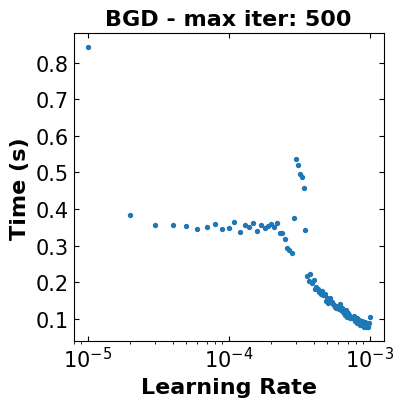

In [73]:
### Sensitivity Analysis for the learning rate (BGD): ###

# Initialize the vector of model parameters
theta_0 = [5, 5]

# Set the gradient threshold:
grad_thres = 1e-7

# Set the maximum number of iterations:
maxIter = 500

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = len(data)

# Define min, max & inc of learning rates
min_lr = 0.00001
max_lr = 0.001
inc_lr = 0.00001
nlr = int((max_lr+inc_lr-min_lr)/inc_lr)

# Initialize a vector for saving learning rate, its loss, and time:
lr_loss_time = np.zeros((nlr,3))

# Define the loop:
count = 0
for lr in np.arange(min_lr,max_lr+inc_lr,inc_lr):

  print('The learning rate is: ', lr)
  start = time.time()
  theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
                learning_rate = lr, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose=False)
  end = time.time()
  
  lr_loss_time[count,:] = lr, loss[-1], end - start

  count += 1


x = lr_loss_time[:,0]
y = lr_loss_time[:,1]
z = lr_loss_time[:,2]
print('  learning rate      loss            time')
print(lr_loss_time)

# Initialize layout
fig, ax1 = plt.subplots(figsize = (4,4))
fig, ax2 = plt.subplots(figsize = (4,4))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

# Add scatterplot
ax1.scatter(x,y, s=8);
ax2.scatter(x,z, s=8);

# Set logarithmic scale on the x variable
ax1.set_xscale("log");
ax2.set_xscale("log");

ax1.set_title("BGD - max iter: 500",fontsize=16,fontweight='bold')
ax1.set_ylabel('Final Loss Value',fontsize=16,fontweight='bold')
ax1.set_xlabel('Learning Rate',fontsize=16,fontweight='bold')

ax2.set_title("BGD - max iter: 500",fontsize=16,fontweight='bold')
ax2.set_ylabel('Time (s)',fontsize=16,fontweight='bold')
ax2.set_xlabel('Learning Rate',fontsize=16,fontweight='bold')

plt.show()

**2-1-4. SGD: (Batch size = 1)**

Only one data sample chosen randomly from the data set is considered to compute the loss function.

Max iterations reached

Total time is:  1.7021312713623047


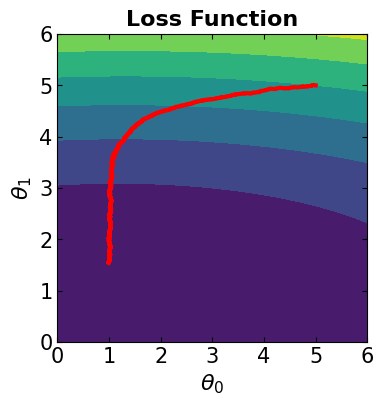

The optimal solution is: theta0 =  0.9952854353527355 , theta1 =  1.5439522770210523
The corresponding loss function is:  0.32792942437403655


In [68]:
### If learning rate = 0.0001 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.0001

# Set the gradient threshold:
grad_thres = 1e-5

# Set the maximum number of iterations:
maxIter = 10000

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = 1

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose = False)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, 0., 6., 50, 0, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))

Max iterations reached

Total time is:  1.4233925342559814


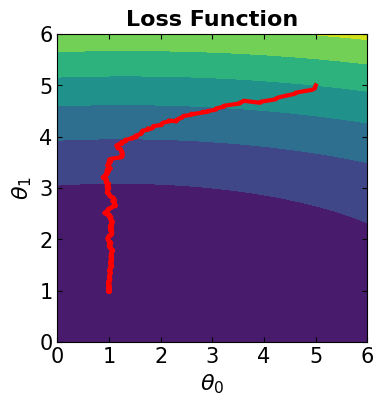

The optimal solution is: theta0 =  1.0096783451667168 , theta1 =  0.9828158198993225
The corresponding loss function is:  0.016145483538611397


In [69]:
### If learning rate = 0.001 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.001

# Set the gradient threshold:
grad_thres = 1e-5

# Set the maximum number of iterations:
maxIter = 10000

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = 1

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose = False)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, 0., 6., 50, 0, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))


SUCCESS
Gradient below the specified tolerance

Total time is:  0.6045074462890625


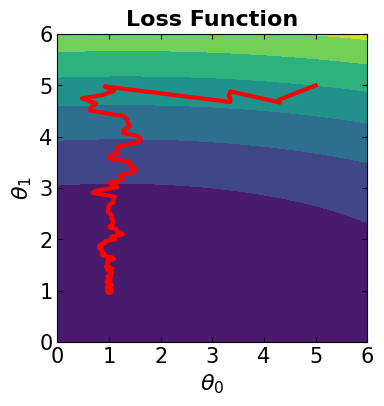

The optimal solution is: theta0 =  1.0063936241085758 , theta1 =  1.0052836030338979
The corresponding loss function is:  2.1453765736611015e-12


In [71]:
### If learning rate = 0.01 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.01

# Set the gradient threshold:
grad_thres = 1e-5

# Set the maximum number of iterations:
maxIter = 10000

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = 1

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose = False)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, 0., 6., 50, 0, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))

The learning rate is:  0.0001
Max iterations reached

The learning rate is:  0.0002
Max iterations reached

The learning rate is:  0.00030000000000000003
Max iterations reached

The learning rate is:  0.0004
Max iterations reached

The learning rate is:  0.0005
Max iterations reached

The learning rate is:  0.0006000000000000001
Max iterations reached

The learning rate is:  0.0007000000000000001
Max iterations reached

The learning rate is:  0.0008
Max iterations reached

The learning rate is:  0.0009000000000000001
Max iterations reached

The learning rate is:  0.001
SUCCESS
Gradient below the specified tolerance

The learning rate is:  0.0011
Max iterations reached

The learning rate is:  0.0012000000000000001
Max iterations reached

The learning rate is:  0.0013000000000000002
Max iterations reached

The learning rate is:  0.0014000000000000002
Max iterations reached

The learning rate is:  0.0015
Max iterations reached

The learning rate is:  0.0016
Max iterations reached

The lea

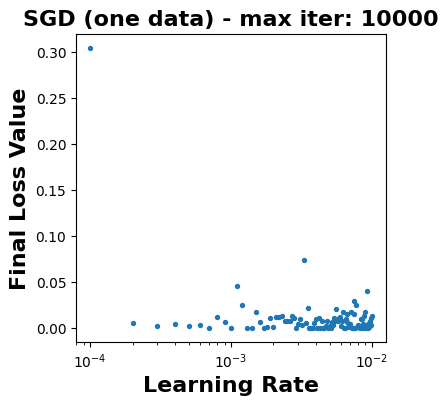

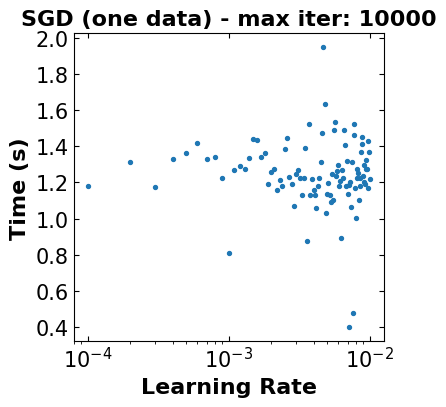

In [74]:
### Sensitivity Analysis for the learning rate (SGD): ###

# Initialize the vector of model parameters
theta_0 = [5, 5]

# Set the gradient threshold:
grad_thres = 1e-5

# Set the maximum number of iterations:
maxIter = 10000

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = 1

# Define min, max & inc of learning rates
min_lr = 0.0001
max_lr = 0.01
inc_lr = 0.0001
nlr = int((max_lr+inc_lr-min_lr)/inc_lr)

# Initialize a vector for saving learning rate, its loss, and time:
lr_loss_time = np.zeros((nlr,3))

# Define the loop:
count = 0
for lr in np.arange(min_lr,max_lr+inc_lr,inc_lr):

  print('The learning rate is: ', lr)
  start = time.time()
  theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
                learning_rate = lr, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose=False)
  end = time.time()
  
  lr_loss_time[count,:] = lr, loss[-1], end - start

  count += 1


x = lr_loss_time[:,0]
y = lr_loss_time[:,1]
z = lr_loss_time[:,2]
print('  learning rate      loss            time')
print(lr_loss_time)

# Initialize layout
fig, ax1 = plt.subplots(figsize = (4,4))
fig, ax2 = plt.subplots(figsize = (4,4))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

# Add scatterplot
ax1.scatter(x,y, s=8);
ax2.scatter(x,z, s=8);

# Set logarithmic scale on the x variable
ax1.set_xscale("log");
ax2.set_xscale("log");

ax1.set_title("SGD (one data) - max iter: 10000",fontsize=16,fontweight='bold')
ax1.set_ylabel('Final Loss Value',fontsize=16,fontweight='bold')
ax1.set_xlabel('Learning Rate',fontsize=16,fontweight='bold')

ax2.set_title("SGD (one data) - max iter: 10000",fontsize=16,fontweight='bold')
ax2.set_ylabel('Time (s)',fontsize=16,fontweight='bold')
ax2.set_xlabel('Learning Rate',fontsize=16,fontweight='bold')

plt.show()

**2-1-5. mBGD: (Batch size = 10)**

10 data samples chosen randomly from the data set are considered to compute the loss function.

Max iterations reached

Total time is:  2.0553228855133057


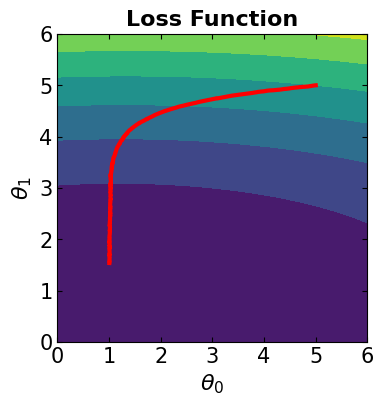

The optimal solution is: theta0 =  1.0058133346703757 , theta1 =  1.5385310507014482
The corresponding loss function is:  3.112445726025017


In [75]:
### If learning rate = 0.00001 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.00001

# Set the gradient threshold:
grad_thres = 1e-6

# Set the maximum number of iterations:
maxIter = 10000

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = 10

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose = False)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, 0., 6., 50, 0, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))

Max iterations reached

Total time is:  2.451550006866455


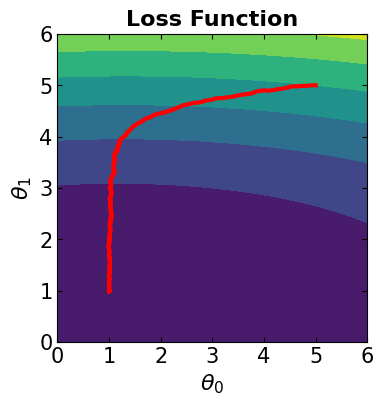

The optimal solution is: theta0 =  1.0004705293680973 , theta1 =  0.9906660383845045
The corresponding loss function is:  0.09409211018801161


In [76]:
### If learning rate = 0.0001 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.0001

# Set the gradient threshold:
grad_thres = 1e-6

# Set the maximum number of iterations:
maxIter = 10000

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = 10

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose = False)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, 0., 6., 50, 0, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))

Max iterations reached

Total time is:  1.9722893238067627


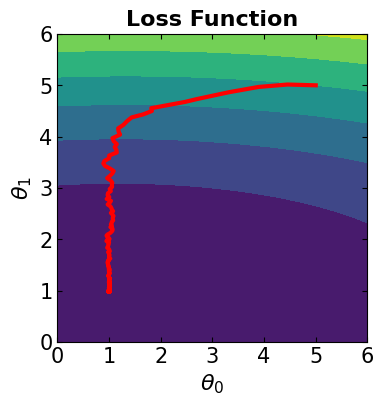

The optimal solution is: theta0 =  1.0019643156955036 , theta1 =  0.9858846261043579
The corresponding loss function is:  0.07547499200241083


In [77]:
### If learning rate = 0.001 ###

####################
##### Step  1  #####
####################
# Initialize the vector of model parameters
theta_0 = [5, 5]

####################
##### Step  2  #####
####################
# Set the learning rate:
gamma_t = 0.001

# Set the gradient threshold:
grad_thres = 1e-6

# Set the maximum number of iterations:
maxIter = 10000

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = 10

#####################
##### Steps 3-4 #####
#####################
# Call the following function to do the steps 3 & 4
# (returns the theta vectors and loss values for all iterations)
start = time.time()
theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
             learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose = False)
end = time.time()
print('Total time is: ', end - start)

# Visualize the convergence track on loss function
fig = plt.figure(figsize=(4,4))
plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
contour_plot(LFx, 0., 6., 50, 0, 6., 50)

# Print the optimal solution
print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
print("The corresponding loss function is: ", str(loss[-1]))

The learning rate is:  1e-05
Max iterations reached

The learning rate is:  2e-05
Max iterations reached

The learning rate is:  3.0000000000000004e-05
Max iterations reached

The learning rate is:  4e-05
Max iterations reached

The learning rate is:  5e-05
Max iterations reached

The learning rate is:  6e-05
Max iterations reached

The learning rate is:  7.000000000000001e-05
Max iterations reached

The learning rate is:  8e-05
Max iterations reached

The learning rate is:  9e-05
Max iterations reached

The learning rate is:  0.0001
Max iterations reached

The learning rate is:  0.00011
Max iterations reached

The learning rate is:  0.00012
Max iterations reached

The learning rate is:  0.00013000000000000002
Max iterations reached

The learning rate is:  0.00014000000000000001
Max iterations reached

The learning rate is:  0.00015000000000000001
Max iterations reached

The learning rate is:  0.00016
Max iterations reached

The learning rate is:  0.00017
Max iterations reached

The le

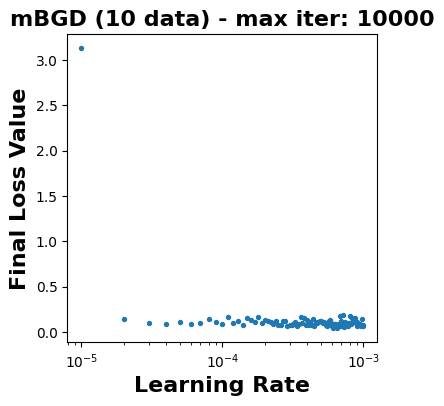

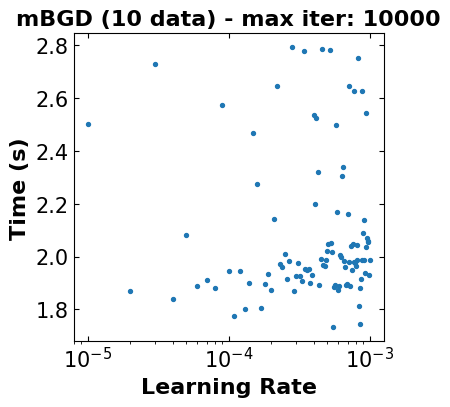

In [78]:
### Sensitivity Analysis for the learning rate (mBGD): ###

# Initialize the vector of model parameters
theta_0 = [5, 5]

# Set the gradient threshold:
grad_thres = 1e-6

# Set the maximum number of iterations:
maxIter = 10000

# Set the batch size: 
# (select "len(data)"" for BGD, "one" for SGD, a "mini-batch size" for mBGD)
k = 10

# Define min, max & inc of learning rates
min_lr = 0.00001
max_lr = 0.001
inc_lr = 0.00001
nlr = int((max_lr+inc_lr-min_lr)/inc_lr)

# Initialize a vector for saving learning rate, its loss, and time:
lr_loss_time = np.zeros((nlr,3))

# Define the loop:
count = 0
for lr in np.arange(min_lr,max_lr+inc_lr,inc_lr):

  print('The learning rate is: ', lr)
  start = time.time()
  theta,loss = SGD_mBGD_BGD(data, f3, theta_0, least_squares_loss_function, grad_approx, \
                learning_rate = lr, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres, verbose=False)
  end = time.time()
  
  lr_loss_time[count,:] = lr, loss[-1], end - start

  count += 1

x = lr_loss_time[:,0]
y = lr_loss_time[:,1]
z = lr_loss_time[:,2]
print('  learning rate      loss            time')
print(lr_loss_time)

# Initialize layout
fig, ax1 = plt.subplots(figsize = (4,4))
fig, ax2 = plt.subplots(figsize = (4,4))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

# Add scatterplot
ax1.scatter(x,y, s=8);
ax2.scatter(x,z, s=8);

# Set logarithmic scale on the x variable
ax1.set_xscale("log");
ax2.set_xscale("log");

ax1.set_title("mBGD (10 data) - max iter: 10000",fontsize=16,fontweight='bold')
ax1.set_ylabel('Final Loss Value',fontsize=16,fontweight='bold')
ax1.set_xlabel('Learning Rate',fontsize=16,fontweight='bold')

ax2.set_title("mBGD (10 data) - max iter: 10000",fontsize=16,fontweight='bold')
ax2.set_ylabel('Time (s)',fontsize=16,fontweight='bold')
ax2.set_xlabel('Learning Rate',fontsize=16,fontweight='bold')

plt.show()

**2-1-6. Conclusions:**

**1. BGD:**
- For BGD, one must find the optimal learning rate (the largest lr showing a stable behavior) to converge fast.
- Although it converges fast to a global min if the problem is convex with small dataset, it is not applicable for huge dataset like Big Data (millions of data)
- BGD is applicable only for small datasets and when the problem has a convex cost function like regression.

**2. SGD:**
- SGD is slower than BGD for small datasets but it has no pattern showing runtime reduction due to stochasticity.
- It converges to the solution in noisier steps and requires bigger threshold than BGD to prevent bouncing around the global min.
- If the problem is not convex, it can also escape local minima provided that we use an adjusted learning rate. (If the lr is too high, it may jump over the global minimum! If it is too low, it cannot come out of a local minimum!)
- SGD is only a basis of advanced stochastic algorithms for Deep NN.

**3. mBGD:**
- mBGD is a good balance between BGD & SGD with one more hyper parameter called batch size.
- If the problem is not convex, it can escape local minima.
- The same as SGD, it requires bigger threshold than BGD to prevent bouncing around the global min.
- mBGD is widely used in training deep NN since it is fast and accurate enough.

### 2-2. Problem 1 - Bigger Dataset (10000 Data)

**2-2-1. Generating Data:**

In [79]:
[data2, fx2] = generate_data_f3([1, 1], -2, 2, 10000, 0.1)

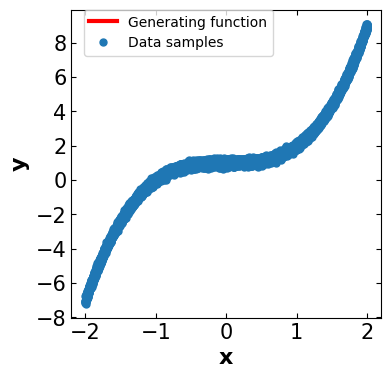

In [88]:
fig = plt.figure(figsize=(4,4))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

plt.plot(fx2[:, 0], fx2[:, 1], 'r', markersize=5, linewidth=3)
plt.plot(data2[:, 0], data2[:, 1], 'o', markersize=5, linewidth=3)
plt.legend(["Generating function", "Data samples"],fontsize=10,bbox_to_anchor=(0.65, 1.0),borderaxespad=0)
plt.xlabel('x',fontsize=16,fontweight='bold')
plt.ylabel('y',fontsize=16,fontweight='bold')

plt.show()

**2-2-2. Plot the Loss Function**

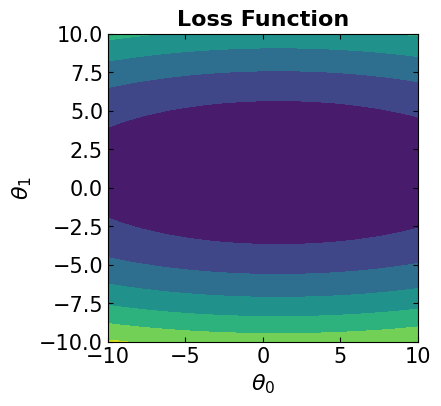

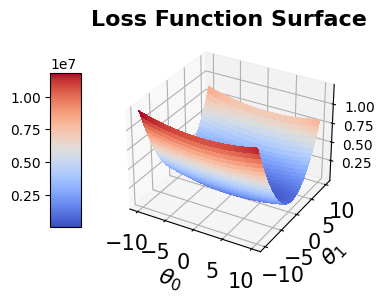

In [89]:
# Loss function with theta = [theta1, theta2] as input
LFx = lambda theta : least_squares_loss_function(data2, f3, theta, range(0, len(data2)))

# Plot of the loss function
fig = plt.figure(figsize=(4,4))
contour_plot(LFx, -10., 10., 50, -10., 10., 50)
contour_surface_plot(LFx, -10., 10., 50, -10., 10., 50)

**2-2-3. Compare the Run-Time:**


---Batch Size =  1
Max iterations reached



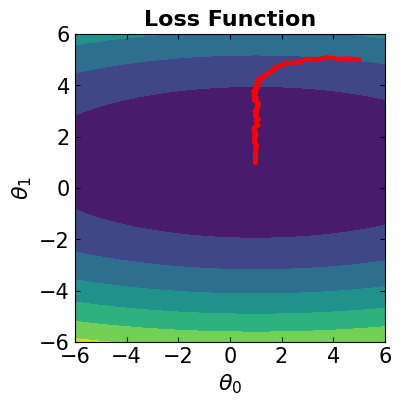

The optimal solution is: theta0 =  1.00396105716062 , theta1 =  1.00335836273951
The corresponding loss function is:  0.001189718845737115

---Batch Size =  5
Max iterations reached



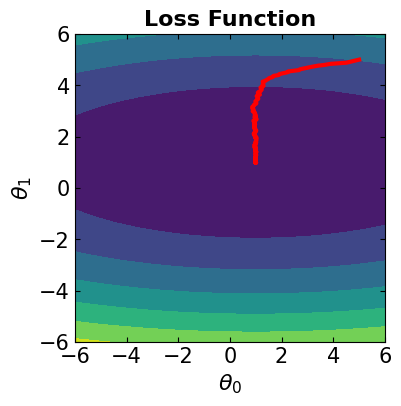

The optimal solution is: theta0 =  0.9923310195398389 , theta1 =  1.0010685523229677
The corresponding loss function is:  0.03479247571873773

---Batch Size =  10
Max iterations reached



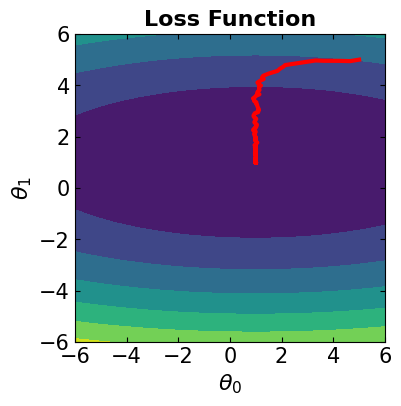

The optimal solution is: theta0 =  1.000882219575753 , theta1 =  0.9988203154713484
The corresponding loss function is:  0.07767044430355274

---Batch Size =  20
Max iterations reached



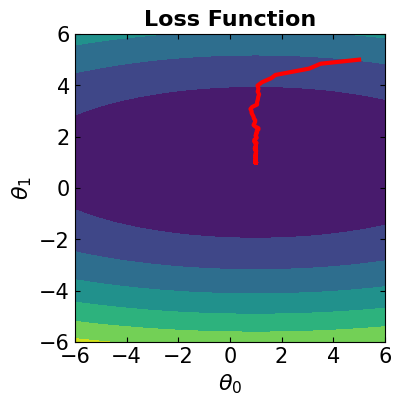

The optimal solution is: theta0 =  1.0026248380782692 , theta1 =  0.9988697821729882
The corresponding loss function is:  0.2253242245914549

---Batch Size =  50
Max iterations reached



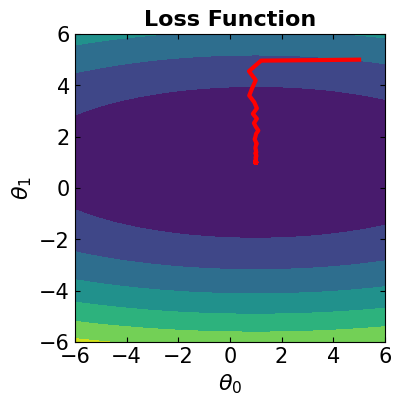

The optimal solution is: theta0 =  1.0015970758783754 , theta1 =  0.9979817161957738
The corresponding loss function is:  0.42437606855768406

---Batch Size =  100
Max iterations reached



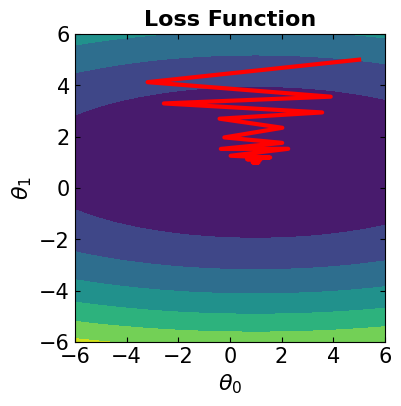

The optimal solution is: theta0 =  1.0052849541769504 , theta1 =  0.9991328571129454
The corresponding loss function is:  1.0379534182570722

---Batch Size =  200
Max iterations reached



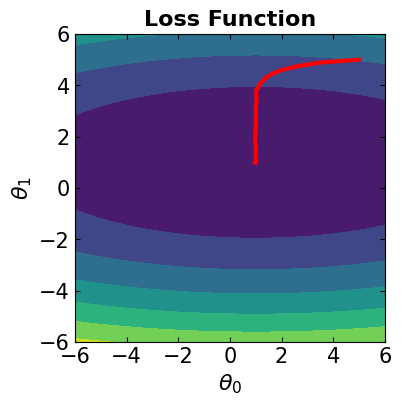

The optimal solution is: theta0 =  0.9997118035038843 , theta1 =  0.9984465924052177
The corresponding loss function is:  1.7084133552247633

---Batch Size =  500
Max iterations reached



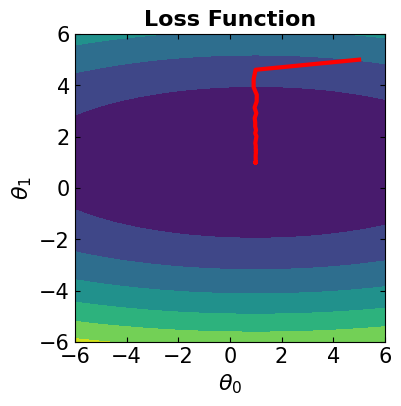

The optimal solution is: theta0 =  1.000286807090962 , theta1 =  0.9991798753291548
The corresponding loss function is:  5.4794432712666765

---Batch Size =  1000
Max iterations reached



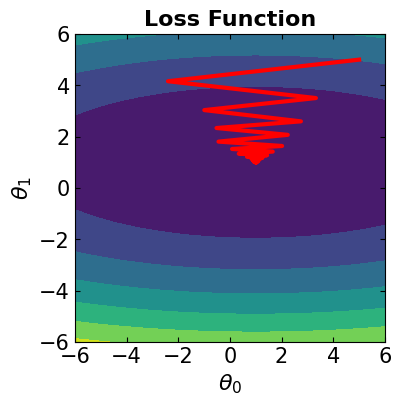

The optimal solution is: theta0 =  1.0029735926578809 , theta1 =  1.000578189031316
The corresponding loss function is:  9.551803887619446

---Batch Size =  2000
Max iterations reached



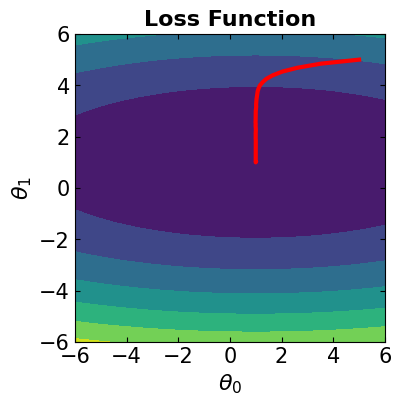

The optimal solution is: theta0 =  1.0001280895331988 , theta1 =  0.9987308184681254
The corresponding loss function is:  20.325235470022463

---Batch Size =  5000
Max iterations reached



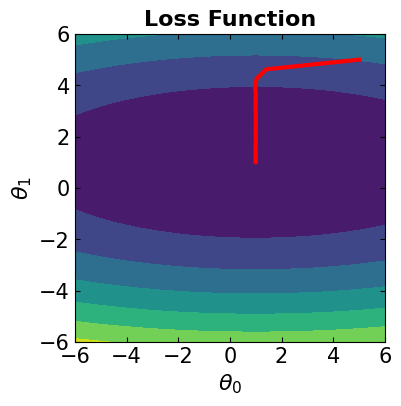

The optimal solution is: theta0 =  0.9996794926738057 , theta1 =  0.9993794331325034
The corresponding loss function is:  50.257707688524796

---Batch Size =  10000
SUCCESS
Gradient below the specified tolerance



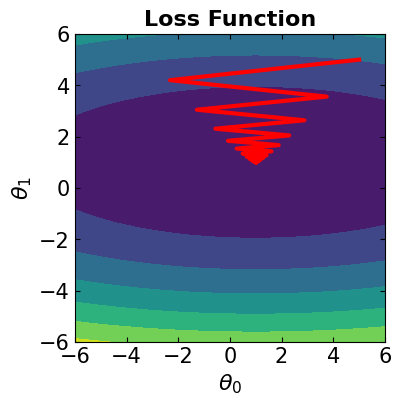

The optimal solution is: theta0 =  0.9998087560478552 , theta1 =  0.9992893193110319
The corresponding loss function is:  99.90911449942031


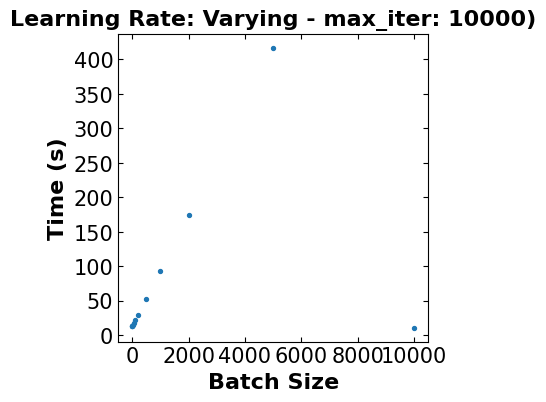

In [90]:
# Initialize the vector of model parameters
theta_0 = [5, 5]

# Set the gradient threshold:
grad_thres = 1e-5

# Set the maximum number of iterations:
maxIter = 10000

# Set a loop for different batch sizes: 
k_values = [1,5,10,20,50,100,200,500,1000,2000,5000,len(data2)]
time_values = []
for k in k_values:
  print('\n---Batch Size = ', k)
  if k <= 100:
    gamma_t = 0.001
  elif k > 100 and k <= 1000:
    gamma_t = 0.0001
  elif k > 1000 and k <= 10000:
    gamma_t = 0.00001

  # Call the following function to do the steps 3 & 4
  # (returns the theta vectors and loss values for all iterations)
  start = time.time()
  theta, loss = SGD_mBGD_BGD(data2, f3, theta_0, least_squares_loss_function, grad_approx, \
              learning_rate = gamma_t, max_iterations = maxIter, batch_size=k, gradient_threshold=grad_thres,verbose = False)
  end = time.time()

  time_values.append(end - start)

  # Visualize the convergence track on loss function
  fig = plt.figure(figsize=(4,4))
  plt.plot(theta[:, 0], theta[:, 1], '-r', markersize=5, linewidth=3)
  contour_plot(LFx, -6., 6., 50, -6, 6., 50)

  # Print the optimal solution
  print("The optimal solution is: theta0 = ", str(theta[-1, 0]), ", theta1 = ", str(theta[-1, 1]))
  print("The corresponding loss function is: ", str(loss[-1]))


# Initialize layout
fig, ax1 = plt.subplots(figsize = (4,4))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)

# Add scatterplot
ax1.scatter(k_values, time_values, s=8);

ax1.set_title("Learning Rate: Varying - max_iter: 10000)",fontsize=16,fontweight='bold')
ax1.set_ylabel('Time (s)',fontsize=16,fontweight='bold')
ax1.set_xlabel('Batch Size',fontsize=16,fontweight='bold')

plt.show()

**2-2-4. Conclusions:**

- The fastest convergence for large datasets is to use:
1. mBGD with a batch size smaller than 10% of dataset size.
2. BGD with the adequately large learning rate.
- In SGD & mBGD, when the learning rate is high enough, the function fluctuates to converge. In this case, there is a chance to escape from local minima and go to the global minimum. Hence, SGD and mBGD are good options for a black box optimization.

## **3. References**

1.  Wu, Wei, et al. "Learning dynamics of gradient descent optimization in deep neural networks." Science China Information Sciences 64 (2021): 1-15.
2. Kwiatkowski, Robert. "Batch, Mini-Batch and Stochastic Gradient Descent for Linear Regression." towardsdatascience, Jun 15. 2021, https://towardsdatascience.com/batch-mini-batch-and-stochastic-gradient-descent-for-linear-regression-9fe4eefa637c.